## Paso 3. Analiza los datos.

In [76]:
#cargar librerias
#Importar las librerias que usaremos en el proyecto
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import math
import seaborn as sns

In [77]:
#Cargar el dataset ya limpio
df_games = pd.read_csv('df_games_clean.csv')

In [78]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  group_plat       16444 non-null  object 
 12  ventas_totales   16444 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.6+ MB


#### 3.1. Mira cuantos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada periodo.?

In [79]:
#Agrupamos por año y contamos el numero de juegos por año.
juegos_lanzados = df_games.groupby('year_of_release')['name'].count()

In [80]:
print(juegos_lanzados)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      61
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


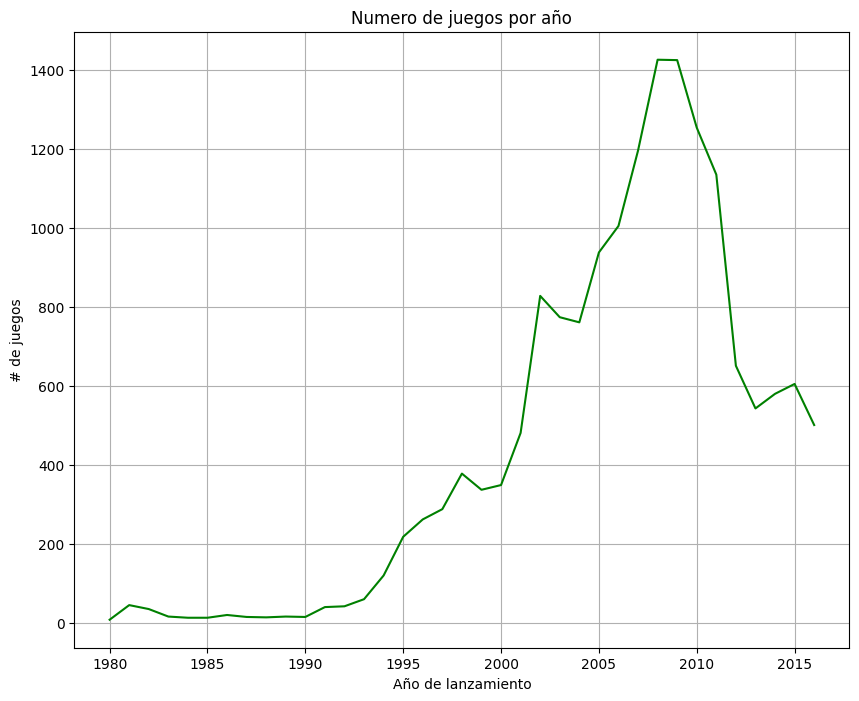

In [81]:
#Vamos a graficar de lineas
juegos_lanzados.plot(kind='line',figsize=(10,8),color='green',grid=True)
plt.title('Numero de juegos por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('# de juegos')
plt.show()

Con los datos vistos en el grafico tenemos un aumento constante en cada año, como la tecnologia va creciendo igual lo hace este sector que crecio exponencialmente hasta el año 2008 y 2009. Ya despues del colapso financiero que se origino en esos mismos años el sector tuvo un declibe importante.

#### 3.2 Observa como varian las ventas de una plataforma a otra.

- Elige las plataformas con las mayores ventas totales y construye una distribucion basada en los datos de cada año.
- Busca las plataformas que solian ser populares pero que ahora no tienen ventas.
¿. Cuanto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer.?


In [82]:
#Identificamos las plataformas con mayores ventas totales
ventas_mas = df_games.groupby(['year_of_release','platform'])['ventas_totales'].sum().sort_values(ascending=False)
print(ventas_mas.head(10))

year_of_release  platform
2004             PS2         211.81
2009             Wii         206.97
2002             PS2         205.38
2003             PS2         184.31
2008             Wii         171.32
2010             X360        170.03
1998             PS          169.49
2001             PS2         166.43
2005             PS2         160.66
2011             PS3         156.78
Name: ventas_totales, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

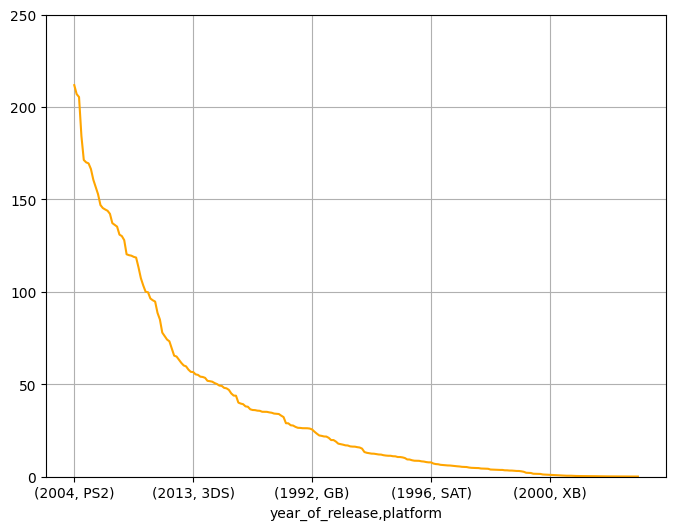

In [83]:
#hacemos un grafico de lineas para ver la distribucion anual de las ventas para las plataformas principales
ventas_mas.plot(x='year_of_release',
                y='ventas_totales',
                kind='line',
                ylim= (0,250),
                grid=True,color='orange',figsize=(8,6))
plt.show

Notamos que en la agrupacion de las plataformas lidera en las ventas la playstation, seguido de nintendo y xbox 

In [84]:
#Plataformas que fueron populares pero ahora no tienen ventas
plataformas_ventas_mas = df_games.groupby(['year_of_release','platform'])['ventas_totales'].sum().sort_values(ascending=False)


In [85]:
print(plataformas_ventas_mas.sort_index(ascending=False).head(20))

year_of_release  platform
2016             XOne         26.15
                 X360          1.52
                 WiiU          4.60
                 Wii           0.18
                 PSV           4.25
                 PS4          69.25
                 PS3           3.60
                 PC            5.25
                 3DS          15.14
2015             XOne         60.14
                 X360         11.96
                 WiiU         16.35
                 Wii           1.14
                 PSV           6.25
                 PSP           0.12
                 PS4         118.90
                 PS3          16.82
                 PC            8.52
                 3DS          27.78
2014             XOne         54.07
Name: ventas_totales, dtype: float64


In [86]:
print(plataformas_ventas_mas.sort_index().head(100))

year_of_release  platform
1980             2600        11.38
1981             2600        35.68
1982             2600        28.88
1983             2600         5.84
                 NES         10.96
                             ...  
2000             WS           0.68
                 XB           0.99
2001             DC           1.07
                 GB           9.24
                 GBA         61.53
Name: ventas_totales, Length: 100, dtype: float64


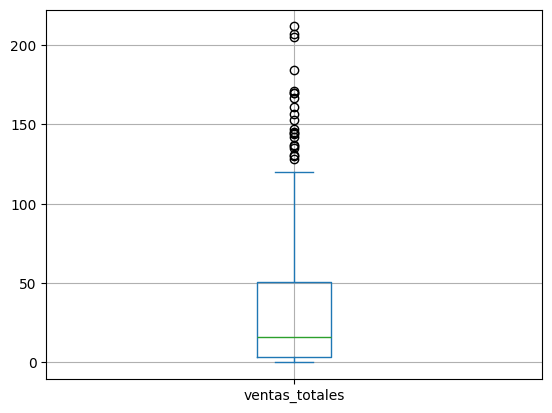

In [87]:
#haciendo grafic de boxplot
plataformas_ventas_mas.plot( y= 'ventas_totales', kind='box',grid=True)
plt.show()

En este grafico de cajas vemos que los valores se concentran 10 y 120 y la media se encuentra en unos 45, contamos con algunos valores atipicos por arriba de 300 

#### 3.3. Determina para que periodo tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberian permitirte construir un modelo para 2017.

- Podemos tomar los ultimos 5 o 10 años, ya que son los mas cercanos y tienen un periodo significativo para predecir los datos del año 2017

#### 3.4. Trabaja solo con los datos que consideres relevantes. Ignora los datos de años anteriores. 

In [88]:
#vamos a trabajar con los datos arriba de 1994, donde se ve el aumento de la demanda ignoramos los años anteriores
df_games_relevantes = df_games[df_games['year_of_release'] >= 1995]

In [89]:
display(df_games_relevantes)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,group_plat,ventas_totales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,nintendo,82.54
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,nintendo,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,nintendo,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,nintendo,31.38
6,new super mario bros,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,nintendo,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16439,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,play,0.01
16440,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,xbox,0.01
16441,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,play,0.01
16442,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,nintendo,0.01


#### 3.5. ¿Que plataformas son lideres de ventas.? .¿Cuales crecen y cuales se reducen.?. Elige varias plataformas potencialmente rentables. 

In [90]:
lideres_ventas = df_games_relevantes.groupby('platform')['ventas_totales'].sum().sort_values(ascending=False)
display(lideres_ventas)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.76
PS       721.55
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       239.79
N64      218.01
GC       196.73
XOne     159.32
GB       139.90
WiiU      82.19
PSV       53.81
SNES      49.59
SAT       29.94
DC        15.95
WS         1.42
NG         0.43
TG16       0.16
3DO        0.08
PCFX       0.03
Name: ventas_totales, dtype: float64

- Las plataformas lideres son PS2, X360, PS3,Wii y DS

In [91]:
menos_ventas = df_games_relevantes.groupby('platform')['ventas_totales'].sum().sort_values()
print(menos_ventas)

platform
PCFX       0.03
3DO        0.08
TG16       0.16
NG         0.43
WS         1.42
DC        15.95
SAT       29.94
SNES      49.59
PSV       53.81
WiiU      82.19
GB       139.90
XOne     159.32
GC       196.73
N64      218.01
PC       239.79
XB       251.57
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       721.55
DS       802.76
Wii      891.18
PS3      931.33
X360     961.24
PS2     1233.56
Name: ventas_totales, dtype: float64


- Las plataformas que menos crecen o venden son PCFX, 3D0, TG16,NG

#### 3.6. Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas.?. ¿Que sucede con las ventas promedio en varias plataformas.?. Describe tus hallazgos. 

<function matplotlib.pyplot.show(close=None, block=None)>

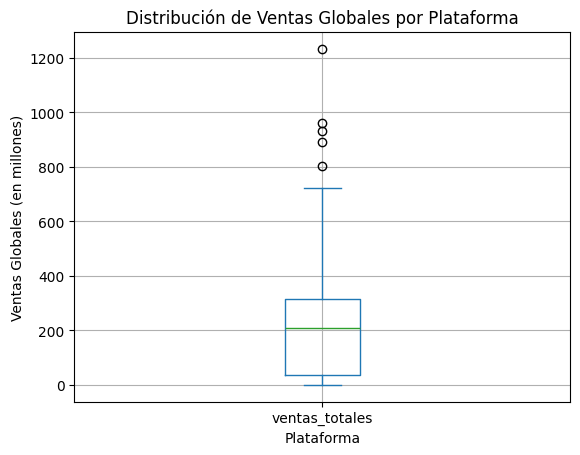

In [92]:
lideres_ventas.plot(
                     x='group_plat',
                     y='ventas_totales',kind='box',grid=True)
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.show

Las ventas se concentran con valor promedio de 210 aprox, y el conjunto de todos los datos se encuentran entre 30 y 310. Vemos 5 valores atipicos que sobresalen por arriba de 800 y 1400 

#### 3.7. Mira como las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu eleccion). Crea un grafico de dispersion y calcula la correlaccion entre las reseñas y las ventas. Saca conclusiones.

In [93]:
comentarios_critic = df_games_relevantes.groupby('critic_score')['ventas_totales'].sum().sort_values(ascending=False).head(20)

In [94]:
print(comentarios_critic)

critic_score
80.0    272.38
76.0    223.64
83.0    219.50
82.0    213.70
84.0    211.84
88.0    208.95
85.0    208.62
87.0    198.51
81.0    170.56
89.0    168.04
86.0    161.19
77.0    153.54
91.0    151.39
73.0    148.98
79.0    142.66
78.0    141.46
74.0    136.06
94.0    126.51
71.0    123.42
92.0    118.51
Name: ventas_totales, dtype: float64


In [95]:
comentarios_critic_score = df_games_relevantes.groupby('user_score')['ventas_totales'].sum().sort_values(ascending=False).head(20)

In [96]:
print(comentarios_critic_score)

user_score
80.0    313.60
79.0    250.82
85.0    237.20
82.0    224.23
87.0    218.96
86.0    218.75
78.0    216.49
84.0    216.06
83.0    200.51
77.0    192.50
81.0    181.91
89.0    177.55
75.0    171.39
76.0    169.92
74.0    153.07
90.0    145.96
88.0    134.69
73.0    133.71
63.0    128.13
66.0    118.19
Name: ventas_totales, dtype: float64


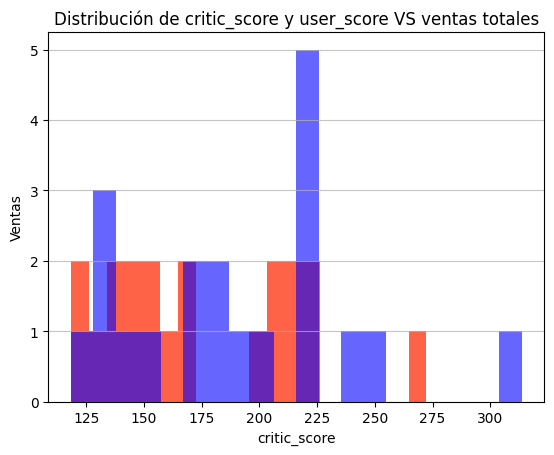

In [97]:
# Crear el histograma
plt.hist(comentarios_critic, bins=20, color='tomato')
plt.hist(comentarios_critic_score, bins=20, color='blue', alpha=0.6)

# Añadir etiquetas y título
plt.xlabel("critic_score")
plt.ylabel("Ventas")
plt.title("Distribución de critic_score y user_score VS ventas totales")

# Añadir una cuadrícula para mejor visualización
plt.grid(axis='y', alpha=0.75)

# Mostrar el histograma
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

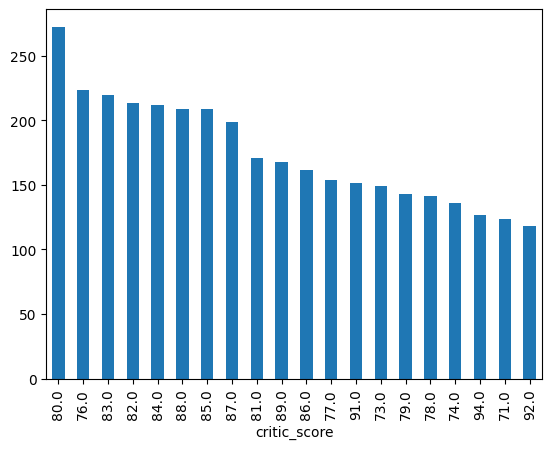

In [98]:
#Graficamos con grafico de barras las criticas de los expertos 
comentarios_critic.plot(x='critic_score', kind='bar')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

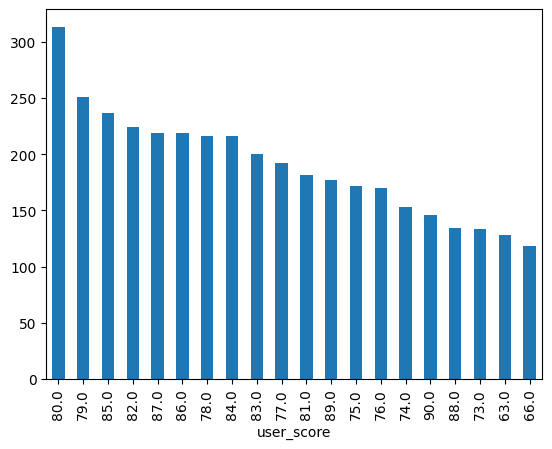

In [99]:
#Graficamos con grafico de barras las criticas de los usuarios
comentarios_critic_score.plot(x='user_score', kind='bar')
plt.show

#### 3.8. Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas. 

In [100]:
juegos_compara = df_games_relevantes[df_games_relevantes['name'] == 'grand theft auto: san andreas']

juegos_compara = juegos_compara[['name','platform','na_sales','eu_sales','jp_sales','other_sales','ventas_totales']]


In [101]:
print(juegos_compara)

                                name platform  na_sales  eu_sales  jp_sales  \
17     grand theft auto: san andreas      PS2      9.43      0.40      0.41   
865    grand theft auto: san andreas       XB      1.26      0.61      0.00   
2091   grand theft auto: san andreas       PC      0.00      0.93      0.00   
10151  grand theft auto: san andreas     X360      0.08      0.02      0.00   

       other_sales  ventas_totales  
17           10.57           20.81  
865           0.09            1.96  
2091          0.04            0.97  
10151         0.01            0.11  


Vemos que los dos grandes gigantes de los juegos Playstation y Xbox son las plataformas que tienen mas ventas, pero en varios juegos como en Grand theft auto: san andreas tiene mas ventas la plataforma de playstation que xbox. Notamos que en las ventas de Japon las lidera playstation ya que no tienen alcance a Xbox. 

#### 3.9. Echa un vistazo a la distribucion general de los juegos por genero. ¿ Que se puede decir de los generos mas rentables.?. ¿ Puedes generalizar acerca de los generos con ventas altas y bajas.?. 

In [102]:
#Contamos el numero total de juegos por genero
contar_generos = df_games_relevantes['genre'].value_counts()
print(contar_generos)

genre
Action          3222
Sports          2237
Misc            1701
Role-Playing    1434
Adventure       1280
Shooter         1247
Racing          1203
Simulation       842
Platform         808
Fighting         792
Strategy         658
Puzzle           533
Name: count, dtype: int64


In [103]:
#Generos con mayores ventas
generos_mas_ventas = df_games_relevantes.groupby('genre')['ventas_totales'].sum().sort_values(ascending=False)
print("Ventas por genero de mayor a menor es:",generos_mas_ventas)

Ventas por genero de mayor a menor es: genre
Action          1645.07
Sports          1258.32
Shooter          967.94
Role-Playing     888.47
Misc             773.67
Racing           692.41
Platform         611.83
Fighting         402.57
Simulation       379.12
Adventure        210.25
Strategy         166.88
Puzzle           158.37
Name: ventas_totales, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

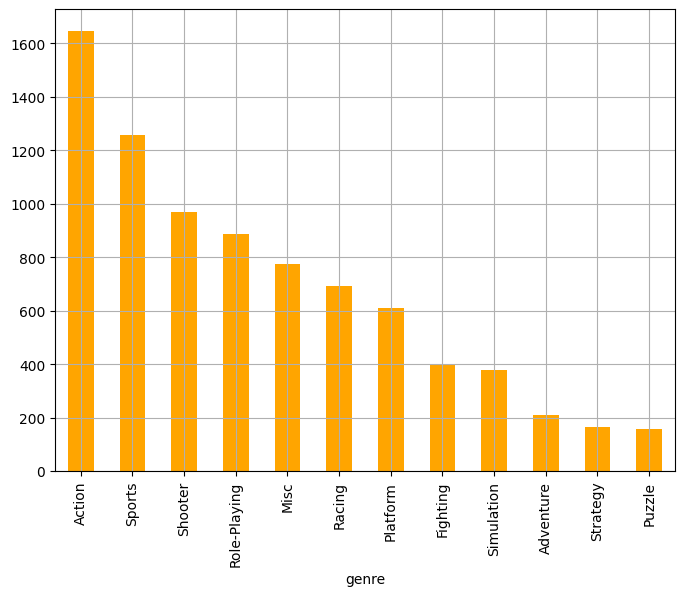

In [104]:
#Haciendo un grafico de barras para conocer la distribucion de los generos con mayores ventas
generos_mas_ventas.plot(
    x='genre',
                y='ventas_totales',
                kind='bar',
                grid=True,color='orange',figsize=(8,6))
plt.show

In [105]:
#Generos con mayores ventas
generos_mas_ventas = df_games_relevantes.groupby('genre')['ventas_totales'].sum().sort_values()
print("Ventas por genero de menor a mayor:",generos_mas_ventas)

Ventas por genero de menor a mayor: genre
Puzzle           158.37
Strategy         166.88
Adventure        210.25
Simulation       379.12
Fighting         402.57
Platform         611.83
Racing           692.41
Misc             773.67
Role-Playing     888.47
Shooter          967.94
Sports          1258.32
Action          1645.07
Name: ventas_totales, dtype: float64


Vemos que los generos con mayores ventas son Action seguido de Sports y en tercer lugar Shooter.
Y los juegos con genero de menor venta son por ultimo Puzzle, Strategy y Adventury.

### Paso 4. Crea un perfil de usuario para cada region

Para cada region(Japon, Europa y NorteAmerica)
#### 4.1. Las 5 plataformas principales. (Describe las variaciones en sus cuotas de mercado de una region a otra)

In [123]:
perfil_NA = df_games_relevantes[df_games_relevantes['na_sales'] > 0]
plataformas_NA =  perfil_NA.groupby('group_plat')['na_sales'].sum().sort_values(ascending=False)
print(plataformas_NA.head(5))

group_plat
play        1524.49
nintendo    1502.46
xbox         870.92
pc            86.52
otros          5.98
Name: na_sales, dtype: float64


In [107]:
perfil_EU = df_games_relevantes[df_games_relevantes['eu_sales'] > 0]
plataformas_EU =  perfil_EU.groupby('group_plat')['eu_sales'].sum().sort_values(ascending=False)
print(plataformas_EU.head(5))

group_plat
play        1090.80
nintendo     721.37
xbox         379.56
pc           131.81
otros          2.11
Name: eu_sales, dtype: float64


In [108]:
perfil_JP = df_games_relevantes[df_games_relevantes['jp_sales'] > 0]
plataformas_JP = perfil_JP.groupby('group_plat')['jp_sales'].sum().sort_values(ascending=False)

print(plataformas_JP.head(5))

group_plat
nintendo    548.73
play        467.74
otros        39.57
xbox         14.02
pc            0.20
Name: jp_sales, dtype: float64


In [132]:
ventas_por_region = pd.DataFrame({
    'America': plataformas_NA,
    'Europa': plataformas_EU,
    'Japon': plataformas_JP
})

print(ventas_por_region)

            America   Europa   Japon
group_plat                          
nintendo    1502.46   721.37  548.73
otros          5.98     2.11   39.57
pc            86.52   131.81    0.20
play        1524.49  1090.80  467.74
xbox         870.92   379.56   14.02


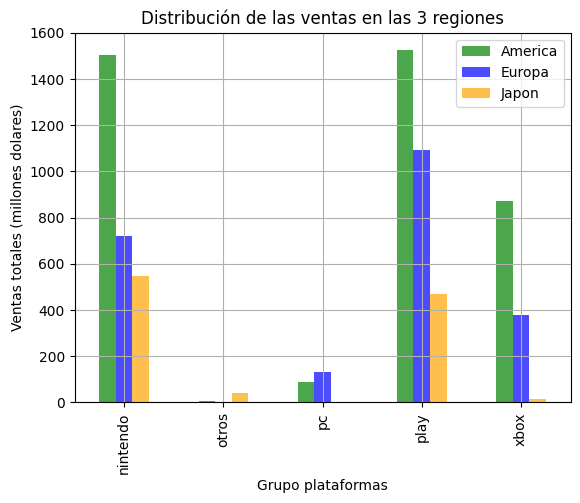

In [ ]:
#Hacemos un grafico de barras para ver las diferencias de ventas entre las 3 regiones
ventas_por_region.plot(kind='bar', color={'America':'green','Europa':'blue','Japon':'orange'},label='Japon', alpha=0.7,grid=True)
# Añadir etiquetas y título
plt.xlabel("Grupo plataformas")
plt.ylabel("Ventas totales (millones dolares)")
plt.title("Distribución de las ventas en las 3 regiones")
plt.legend(loc= 'upper right')
plt.show()

1.- Comparando el grupo de plataformas Nintendo en las 3 regiones, vemos que tiene mas del doble de ventas que Europa y Japon es el que tiene menos ventas con 548.73 
2.- Comparando la Playstation America lidera las ventas con 1,524 (millones de dolares), seguido de Europa con 1,090 y al final Japon con 467
3.- Comparando la Xbox de nuevo America lidera con 870 y Europa con 379 y Japon solo con 14

Tenemos varios factores que pueden influir en las ventas de cada region como la poblacion, la distribucion y prohibiciones de importacion del sector de videojuegos 

#### 4.1 Los cinco principales genero. Explica la diferencia. 

In [135]:
generos_NA =  df_games_relevantes.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
generos_EU =  df_games_relevantes.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
generos_JP =  df_games_relevantes.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

print(generos_NA.head(5))
print(generos_EU.head(5))
print(generos_JP.head(5))

genre
Action     814.11
Sports     655.07
Shooter    527.59
Misc       392.43
Racing     342.82
Name: na_sales, dtype: float64
genre
Action     503.35
Sports     367.34
Shooter    308.23
Racing     230.32
Misc       208.88
Name: eu_sales, dtype: float64
genre
Role-Playing    315.17
Action          146.46
Sports          104.31
Misc             99.51
Platform         77.05
Name: jp_sales, dtype: float64


In [136]:
ventas_por_genero = pd.DataFrame({
    'America': generos_NA,
    'Europa': generos_EU,
    'Japon': generos_JP
})

print(ventas_por_genero)

              America  Europa   Japon
genre                                
Action         814.11  503.35  146.46
Adventure       91.86   56.75   45.68
Fighting       205.25   94.50   67.67
Misc           392.43  208.88   99.51
Platform       318.83  170.03   77.05
Puzzle          71.27   42.74   33.57
Racing         342.82  230.32   44.73
Role-Playing   327.55  188.08  315.17
Shooter        527.59  308.23   30.06
Simulation     177.05  111.77   59.96
Sports         655.07  367.34  104.31
Strategy        66.54   43.66   46.09


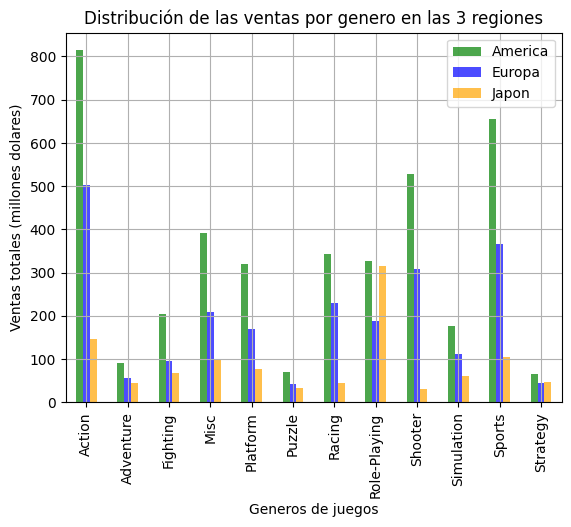

In [ ]:
#Hacemos un grafico de barras para ver las diferencias de ventas por genero entre las 3 regiones
ventas_por_genero.plot(kind='bar', color={'America':'green','Europa':'blue','Japon':'orange'},label='Japon', alpha=0.7,grid=True)
# Añadir etiquetas y título
plt.xlabel("Generos de juegos")
plt.ylabel("Ventas totales (millones dolares)")
plt.title("Distribución de las ventas por genero en las 3 regiones")
plt.legend(loc= 'upper right')
plt.show()

#### 4.3 Si las clasificaciones de ESRB afectan a las ventas en regiones individuales